In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
dataset = pd.read_csv('final_dataset.csv')

In [3]:
dataset.sort_values(by=['flat_type'])

,resale_price,street_name,year,town,flat_type,floor_area_sqm,flat_model,remaining_lease,max_storey,dist_mrt,dist_cbd,cpi,town_premium,model_premium,dist_mall,type_premium
0,9000.0,ANG MO KIO AVE 1,1990,ANG MO KIO,1 ROOM,31.0,IMPROVED,86,12,0.932303,8.552536,62.743,-68000.0,-228000.0,8.552536,-283500.0
860,52500.0,TELOK BLANGAH CRES,1998,BUKIT MERAH,1 ROOM,31.0,IMPROVED,76,3,1.272618,3.821622,73.428,0.0,-228000.0,3.821622,-283500.0
859,48000.0,TELOK BLANGAH CRES,1998,BUKIT MERAH,1 ROOM,31.0,IMPROVED,76,12,1.272618,3.821622,73.428,0.0,-228000.0,3.821622,-283500.0
858,53000.0,TELOK BLANGAH CRES,1998,BUKIT MERAH,1 ROOM,31.0,IMPROVED,76,12,1.272618,3.821622,73.428,0.0,-228000.0,3.821622,-283500.0
857,49500.0,TELOK BLANGAH CRES,1998,BUKIT MERAH,1 ROOM,31.0,IMPROVED,76,9,1.272618,3.821622,73.428,0.0,-228000.0,3.821622,-283500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852998,745000.0,TAMPINES ST 42,2012,TAMPINES,MULTI-GENERATION,166.0,Multi Generation,74,9,0.270070,13.895610,96.205,26000.0,105000.0,13.895610,194500.0
852999,760000.0,TAMPINES ST 42,2012,TAMPINES,MULTI-GENERATION,166.0,Multi Generation,74,5,0.270070,13.895610,96.205,26000.0,105000.0,13.895610,194500.0
853000,610000.0,TAMPINES ST 42,2012,TAMPINES,MULTI-GENERATION,132.0,Multi Generation,74,9,0.270070,13.895610,96.205,26000.0,105000.0,13.895610,194500.0
852988,380000.0,TAMPINES ST 42,2007,TAMPINES,MULTI-GENERATION,132.0,Multi Generation,79,6,0.270070,13.895610,79.251,26000.0,105000.0,13.895610,194500.0


In [4]:
# statistical measures of the dataset
dataset.columns

Index(['resale_price', 'street_name', 'year', 'town', 'flat_type',
       'floor_area_sqm', 'flat_model', 'remaining_lease', 'max_storey',
       'dist_mrt', 'dist_cbd', 'cpi', 'town_premium', 'model_premium',
       'dist_mall', 'type_premium'],
      dtype='object')

# Rough Sensing of the Dataset - With and without flat type splits

We will first take a look at time series charts to check the general trend of the resale prices with categorial splits of town types.

    First plot is to check the number of resale flats in each flat type
    Second plot is a bivariate analysis where we check the dependence of the resale price on the year
    Third plot is the same plot as the first one except we split for the categorical 'town' data
    Fourth plot is a regression plot for the resale price dependence on distance from mrt for 4 Room flats
    Fifth plot is a regression plot for the resale price dependence on distance from CBD for 4 Room flats
    Sixth plot is a regression plot for the resale price dependence on distance from nearest mall for 4 Room flats

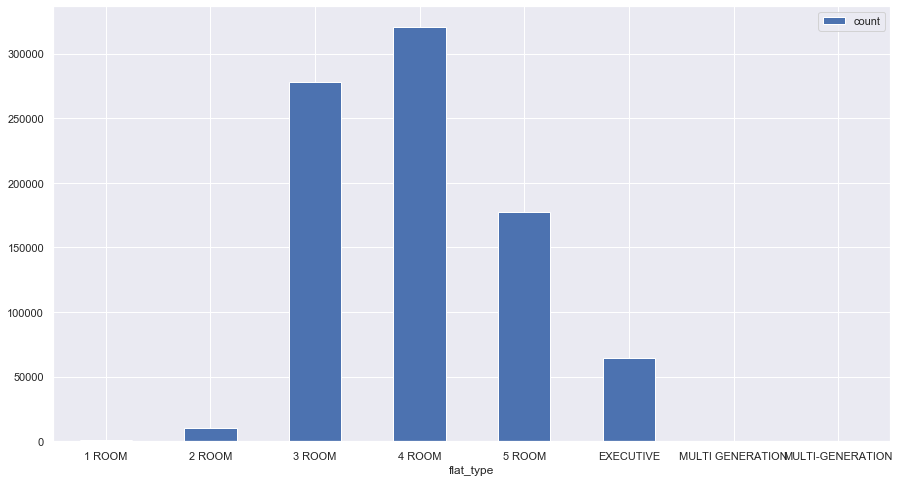

In [5]:
sns.set(rc={'figure.figsize':(15,8)})
test = dataset.groupby(['flat_type'],as_index = False).count()[['flat_type','resale_price']]
test = test.rename(columns = {'resale_price' : 'count'})
test.plot.bar(x='flat_type', y='count', rot=0)

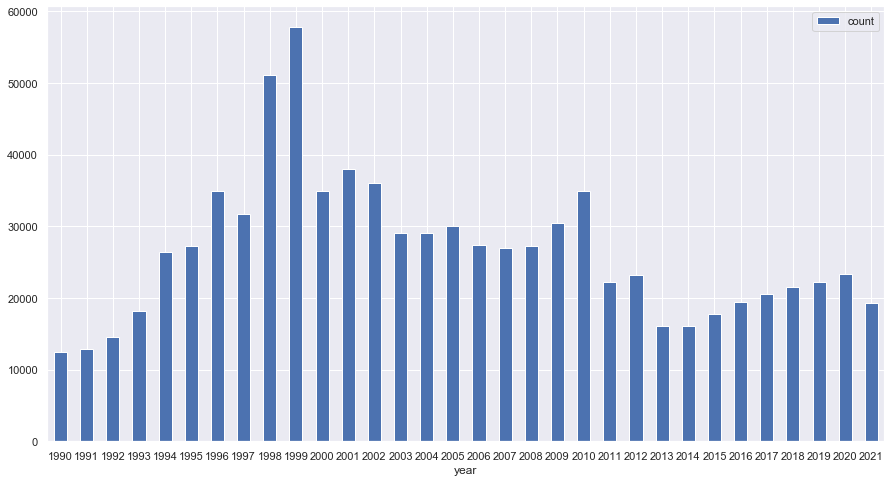

In [6]:
test = dataset.groupby(['year'],as_index = False).count()[['year','resale_price']]
test = test.rename(columns = {'resale_price' : 'count'})
test.plot.bar(x='year', y='count', rot=0)

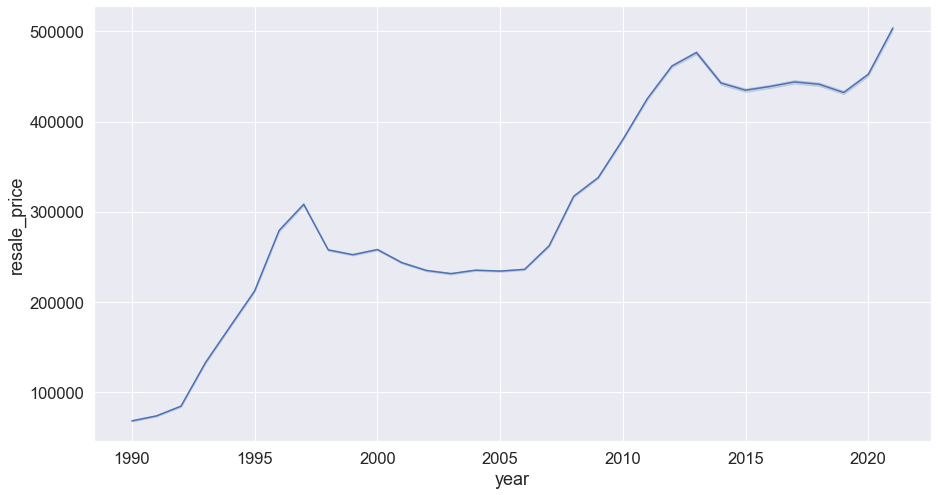

In [7]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)
fig = sns.lineplot(x=dataset.year, y=dataset.resale_price)

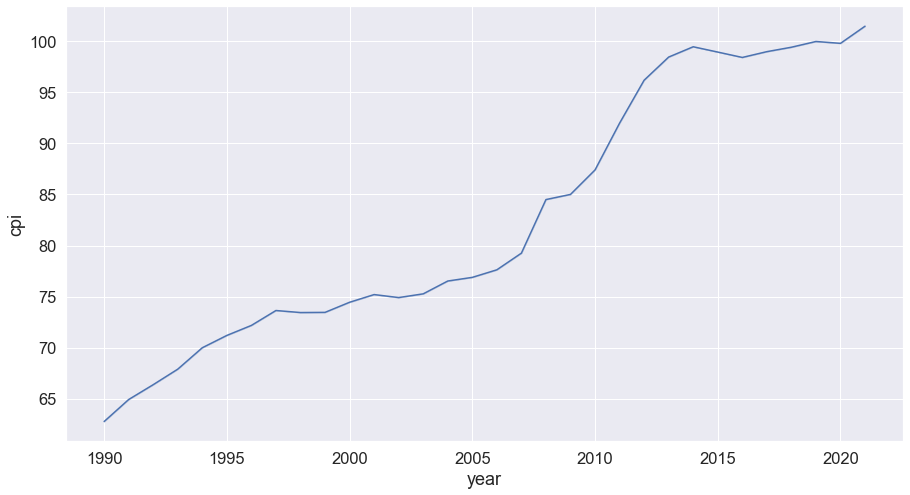

In [8]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)
fig = sns.lineplot(x=dataset.year, y=dataset.cpi)

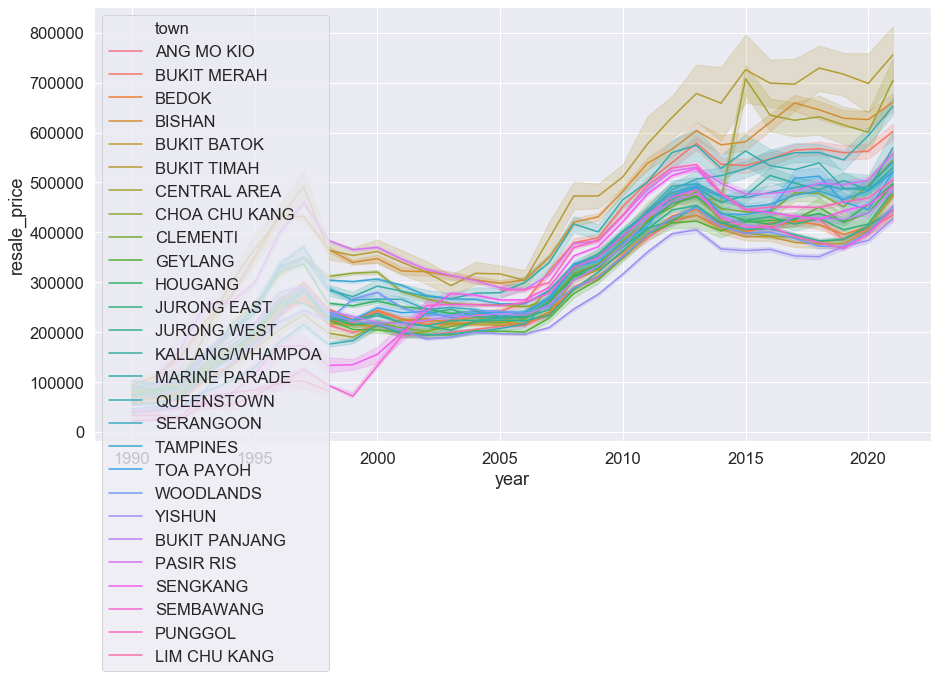

In [9]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)
fig = sns.lineplot(x=dataset.year, y=dataset.resale_price, hue=dataset['town'], legend = 'brief')

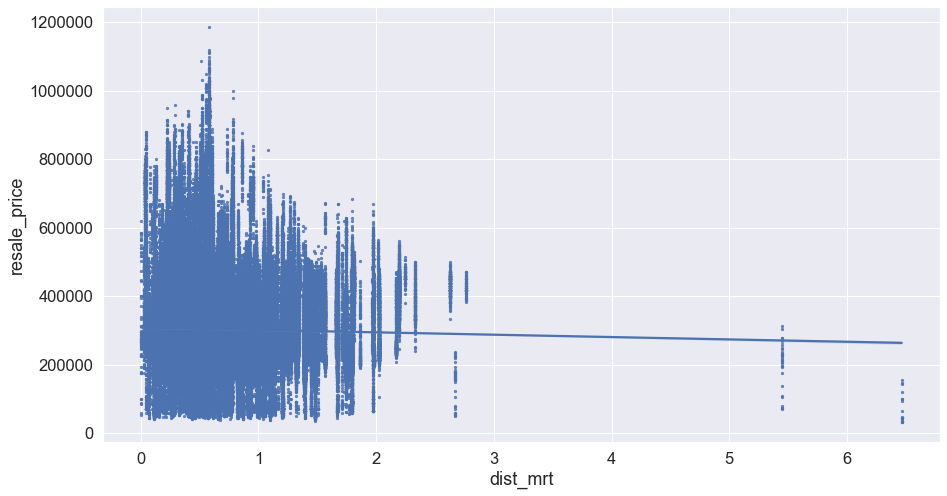

In [10]:
dataset_4Room = dataset.loc[dataset['flat_type'] == '4 ROOM']
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)
fig = sns.regplot(x=dataset_4Room.dist_mrt, y=dataset_4Room.resale_price, scatter_kws={'s':5})

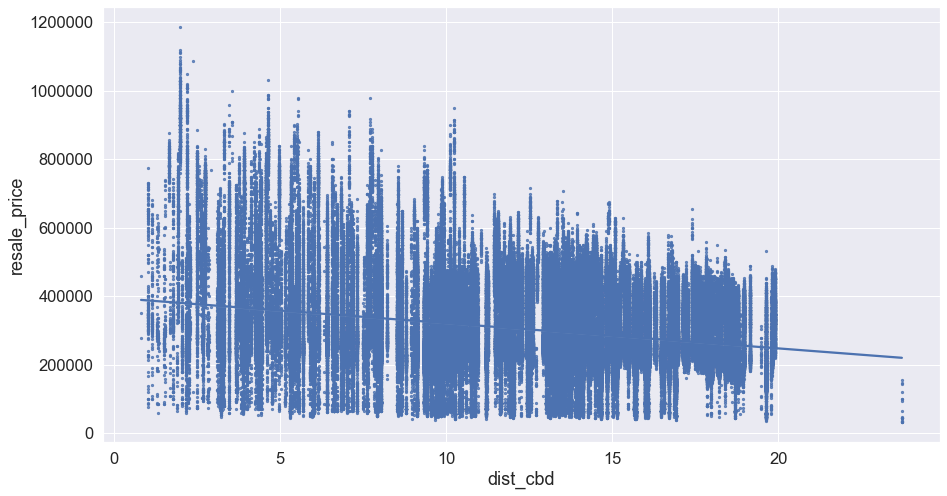

In [11]:
dataset_4Room = dataset.loc[dataset['flat_type'] == '4 ROOM']
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)
fig = sns.regplot(x=dataset_4Room.dist_cbd, y=dataset_4Room.resale_price, scatter_kws={'s':5})

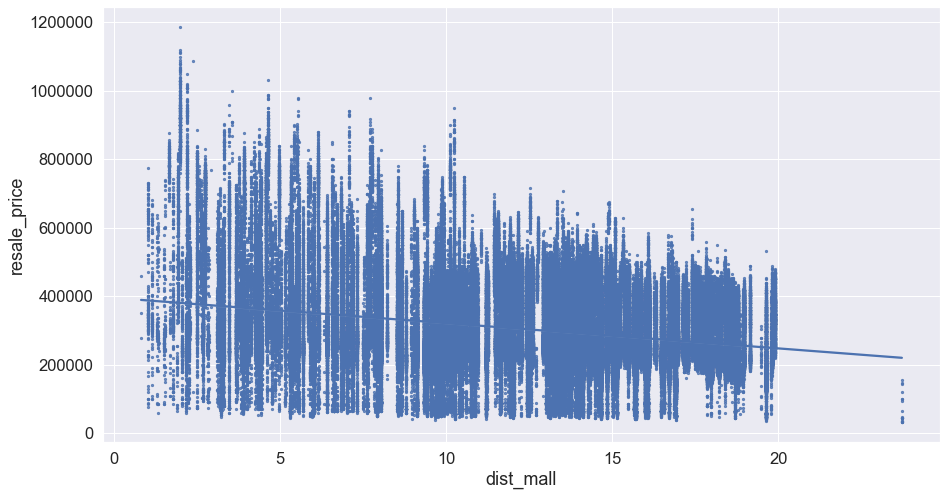

In [12]:
dataset_4Room = dataset.loc[dataset['flat_type'] == '4 ROOM']
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)
fig = sns.regplot(x=dataset_4Room.dist_mall, y=dataset_4Room.resale_price, scatter_kws={'s':5})

Next step is to look at the correlations of all the features with resale prices using the corr method

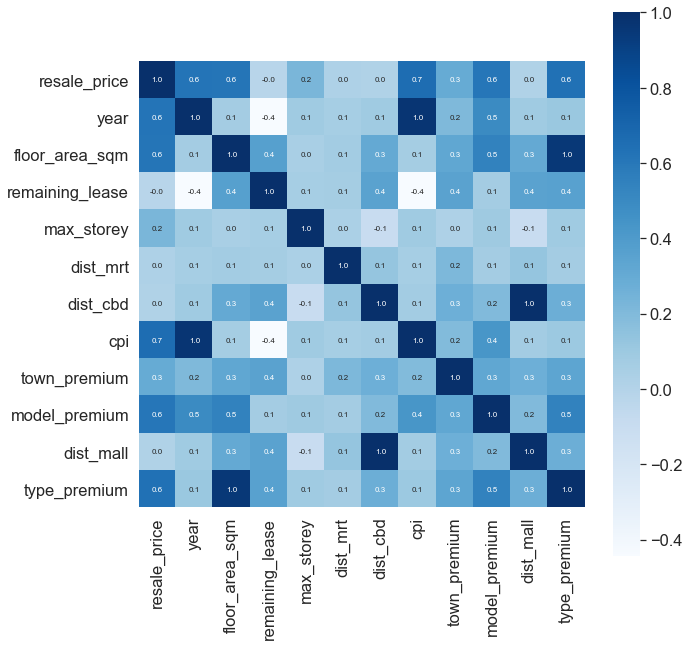

In [13]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Darker regions on the heatmap shows the correlation of the 2 variables

Focusing on the resale price row (1st row), it can be seen that the year and floor_area_sqm plays a very strong correlation since both have a score of 0.6. The variable with the highest correlation however is the CPI data which is at 0.7.
Another variable worth noting is the max_storey

The following parts will the split the data futher into flat types and check for these correlations once again.

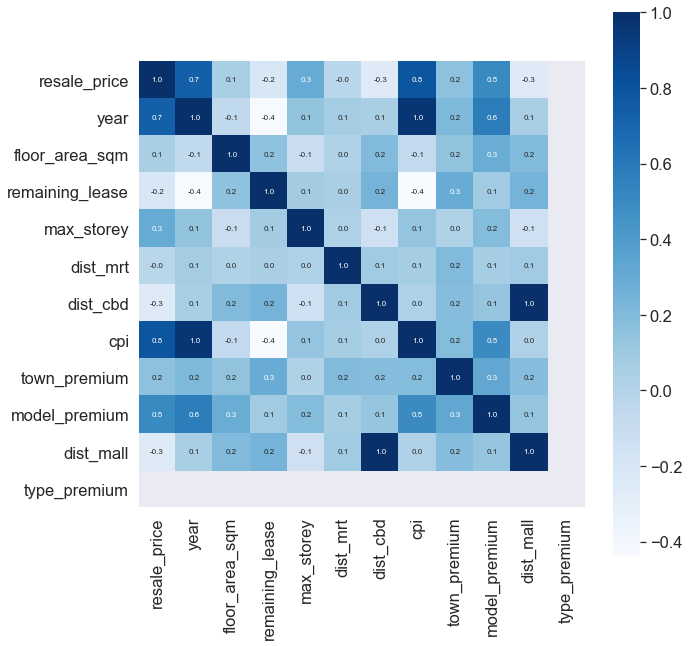

In [14]:
dataset_4Room = dataset.loc[dataset['flat_type'] == '4 ROOM']
correlation = dataset_4Room.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Modelling Part 1

We begin by modelling the flat type with the most resale flats which is the 4 Room flats

In [15]:
y = dataset_4Room[['resale_price']]
x = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [17]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(256400, 9) (256400, 1)
(64101, 9) (64101, 1)


In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [19]:
predictions = lm.predict(X_test)

In [20]:
model.coef_

array([[ 2.27286403e+03,  3.35546743e+03,  3.15437847e+03,
        -2.00653519e+04, -5.07650775e+03, -5.07650775e+03,
         9.86077645e+03, -9.41866617e-02,  4.96376450e-02]])

Text(0, 0.5, 'Predictions')

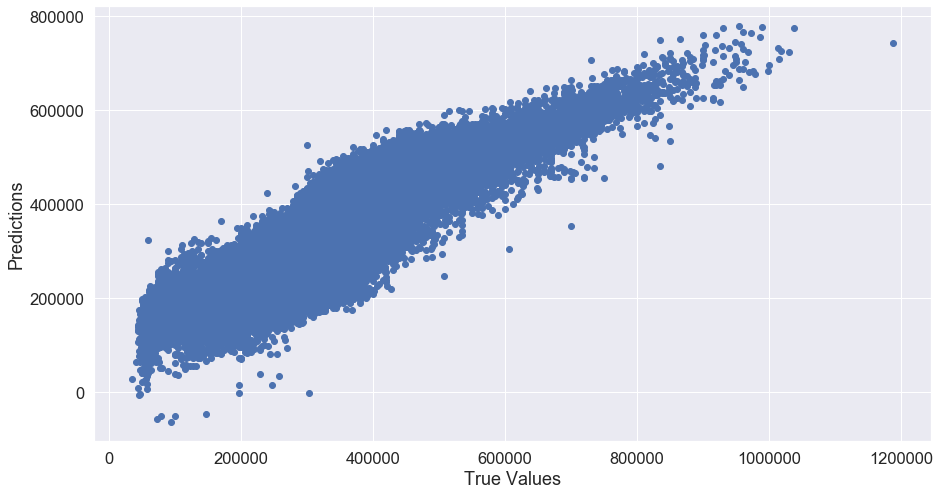

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [22]:
#Returns the coefficient of determination R^2 of the prediction.
print ("Score:", model.score(X_test, y_test))

Score: 0.7971167398394485


In [23]:
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.01, 
                                          loss = 'ls')

In [24]:
clf2.fit(X_train,y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
clf2.score(X_test,y_test)

0.93223054958842

In [26]:
importance = clf2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 1.86%
remaining_lease: 6.02%
max_storey: 1.68%
dist_mrt: 0.94%
dist_cbd: 6.47%
dist_mall: 6.15%
cpi: 73.18%
town_premium: 1.94%
model_premium: 1.77%


Thc conclusion at this juncture is that the cpi is an overwhelming influence to the resale prices which may not actually be a causal feature. In the next model, cpi data will be left out.

In [97]:
y1 = dataset_4Room[['resale_price']]
x1 = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium']]

Text(0, 0.5, 'Predictions')

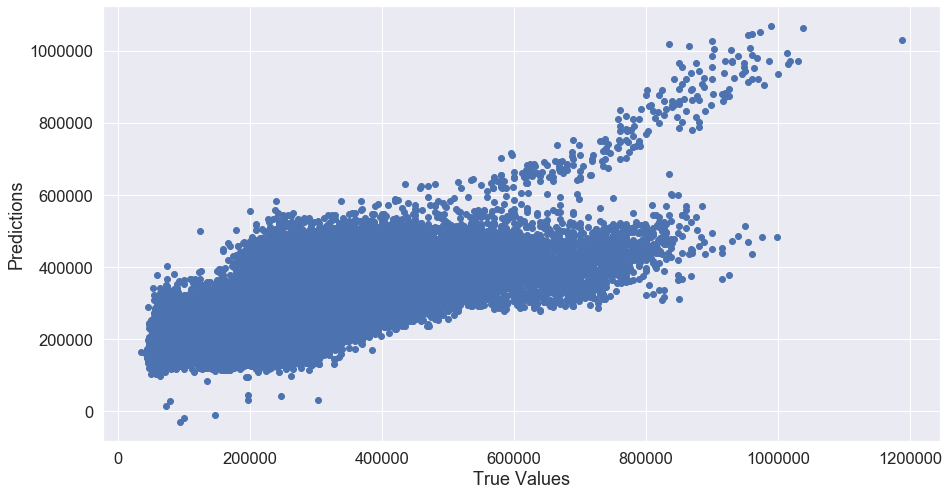

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2,random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [99]:
#Returns the coefficient of determination R^2 of the prediction.
print ("Score:", model.score(X_test, y_test))

Score: 0.4380417077455693


In [100]:
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.01, 
                                          loss = 'ls')

In [101]:
clf2.fit(X_train,y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
clf2.score(X_test,y_test)

0.737808708992945

In [114]:
importance = clf2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 10.04%
remaining_lease: 28.80%
max_storey: 6.36%
dist_mrt: 2.00%
dist_cbd: 7.46%
dist_mall: 9.30%
town_premium: 4.82%
model_premium: 31.23%


This time while the overall score of the predictor doesn't do as well, we get a more even distibution of what the drivers of the prices are. We have remaining lease having the most weightage at 30%, flat model at 28%, distance to CBD at ~17%, floor area at ~10%, distance from mrt, storey level and 

# Modelling Part 2 - Other Ensemble Methods

This time we use XGBoost Regressor

In [34]:
y = dataset_4Room[['resale_price']]
x = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [35]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Prediction on the training data

In [36]:
predictions = model.predict(X_train)
# R squared error
score_1 = metrics.r2_score(y_train, predictions)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, predictions)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9704274035148891
Mean Absolute Error :  15822.259951703574


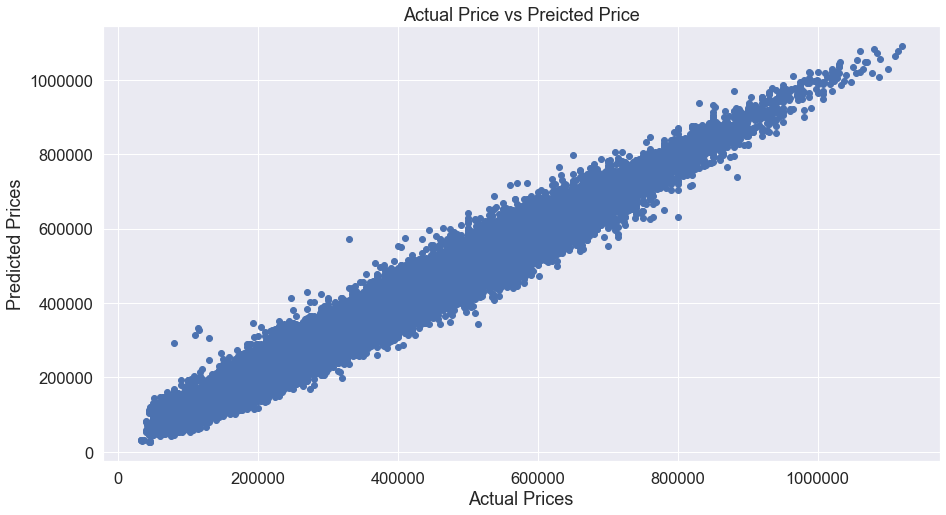

In [37]:
plt.scatter(y_train, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [38]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.968648108808485
Mean Absolute Error :  16166.66739015382


The XGBoost Regressor outperperformed the ensemble.GradientBoostingRegressor with an  R squared error :  0.889328952806457 vs 0.8725476588633099
Its advantages can be explained by:
1. Its computing second-order gradients, i.e. second partial derivatives of the loss function (similar to Newton’s method)
2. Advanced regularization (L1 & L2), which improves model generalization.

In [39]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.27%
remaining_lease: 6.06%
max_storey: 2.85%
dist_mrt: 1.69%
dist_cbd: 12.13%
dist_mall: 0.00%
cpi: 63.46%
town_premium: 4.30%
model_premium: 7.24%


Performing regression on data without cpi

In [40]:
y1 = dataset_4Room[['resale_price']]
x1 = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2,random_state=4)
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Prediction on test data

In [41]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.886291929604193
Mean Absolute Error :  30670.49798201276


In [42]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 8.22%
remaining_lease: 10.90%
max_storey: 10.24%
dist_mrt: 3.73%
dist_cbd: 11.91%
dist_mall: 0.00%
town_premium: 10.05%
model_premium: 44.97%


Next we try with Random Forest Regressor

In [43]:
y = dataset_4Room[['resale_price']]
x = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [44]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9682534579642255
Mean Absolute Error :  15862.69543469438


In [45]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.57%
remaining_lease: 7.16%
max_storey: 1.60%
dist_mrt: 1.60%
dist_cbd: 6.45%
dist_mall: 6.11%
cpi: 69.72%
town_premium: 2.86%
model_premium: 1.93%


Performing regression on data without cpi

In [46]:
y1 = dataset_4Room[['resale_price']]
x1 = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2,random_state=4)

# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [47]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9369942763135156
Mean Absolute Error :  20766.070843574522


In [48]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 11.08%
remaining_lease: 29.44%
max_storey: 5.69%
dist_mrt: 5.75%
dist_cbd: 8.26%
dist_mall: 10.28%
town_premium: 5.26%
model_premium: 24.24%


# Modelling Part 3 - Backtesting the model

In this section we use the data from 1990 to 2018 to train the model and test it against the 2019 to 2021 data

In [120]:
dataset_all = dataset[(dataset['year'] >= 1990) & (dataset['year'] <= 2018) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_all[['resale_price']]
x = dataset_all[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [86]:
# predicting the 2019 to 2021 prices and checking the prediction performance
dataset_recent = dataset[(dataset['year'] >= 2019) & (dataset['year'] <= 2021) & (dataset['flat_type'] == '4 ROOM')]
yr = dataset_recent[['resale_price']]
xr = dataset_recent[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]

In [93]:
 # create regressor object
regressorall = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressorall.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [83]:
# accuracy for prediction on test data
test_data_prediction = regressorall.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9630291237652809
Mean Absolute Error :  15700.753521449366


In [87]:
# accuracy for prediction on test data
test_data_prediction = regressorall.predict(xr)
# R squared error
score_1 = metrics.r2_score(yr, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(yr, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8354144278603475
Mean Absolute Error :  39220.26355149128


In [84]:
importance = regressorall.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 3.16%
remaining_lease: 5.84%
max_storey: 1.52%
dist_mrt: 1.53%
dist_cbd: 6.22%
dist_mall: 6.14%
cpi: 71.76%
town_premium: 2.48%
model_premium: 1.36%


Using the XGBRegressor

In [88]:
model_all = XGBRegressor()
model_all.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [90]:
predictions = model_all.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, predictions)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, predictions)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9649194667942785
Mean Absolute Error :  15663.143909738139


In [91]:
predictions = model_all.predict(xr)
# R squared error
score_1 = metrics.r2_score(yr, predictions)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(yr, predictions)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8360779306880751
Mean Absolute Error :  40127.71239181983


In [92]:
importance = model_all.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.77%
remaining_lease: 4.49%
max_storey: 2.49%
dist_mrt: 1.56%
dist_cbd: 11.41%
dist_mall: 0.00%
cpi: 66.86%
town_premium: 3.73%
model_premium: 6.69%


Using Gradient Boosting Regressor

In [119]:
clf3 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.01, 
                                          loss = 'ls')

In [121]:
clf3.fit(X_train,y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
clf3.score(X_test,y_test)

0.929881025694953

In [162]:
y_test

,resale_price
512059,700000.0
546147,228000.0
682175,470000.0
626154,280000.0
704626,500000.0
...,...
631683,210000.0
634607,360000.0
645893,390000.0
567649,390000.0


In [125]:
clf3.score(xr,yr)

0.7654300153312406

In [124]:
importance = clf3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.14%
remaining_lease: 4.72%
max_storey: 1.48%
dist_mrt: 0.86%
dist_cbd: 5.95%
dist_mall: 6.25%
cpi: 75.29%
town_premium: 1.71%
model_premium: 1.60%


In [176]:
dataset_5Roomt = dataset[(dataset['year'] >= 1990) & (dataset['year'] <= 2018) & (dataset['flat_type'] == '5 ROOM')]
y5_train = dataset_5Roomt[['resale_price']]
x5_train = dataset_5Roomt[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]
X5_train, X5_test, Y5_train, Y5_test = train_test_split(x5_train, y5_train, test_size=0.2,random_state=42)

dataset_5Room = dataset[(dataset['year'] >= 2019) & (dataset['year'] <= 2021) & (dataset['flat_type'] == '5 ROOM')]
y5 = dataset_5Room[['resale_price']]
x5 = dataset_5Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]

In [127]:
# accuracy for prediction on test data
test_data_prediction = regressorall.predict(x5)
# R squared error
score_1 = metrics.r2_score(y5, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y5, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.39106593233425524
Mean Absolute Error :  88010.63589715528


In [173]:
dataset_3Roomt = dataset[(dataset['year'] >= 1990) & (dataset['year'] <= 2018) & (dataset['flat_type'] == '3 ROOM')]
y3_train = dataset_3Roomt[['resale_price']]
x3_train = dataset_3Roomt[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]
X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3_train, y3_train, test_size=0.2,random_state=42)

dataset_3Room = dataset[(dataset['year'] >= 2019) & (dataset['year'] <= 2021) & (dataset['flat_type'] == '3 ROOM')]
y3 = dataset_3Room[['resale_price']]
x3 = dataset_3Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]

In [133]:
# accuracy for prediction on test data
test_data_prediction = regressorall.predict(x3)
# R squared error
score_1 = metrics.r2_score(y3, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y3, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  -1.0283018110129922
Mean Absolute Error :  105063.98824777947


Creating 3 Room and 5 Room's own regressors

In [171]:
 # create regressor object
regressor3 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor3.fit(X3_train, Y3_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [172]:
importance = regressor3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X3_train.columns[i],v*100))

floor_area_sqm: 3.20%
remaining_lease: 1.82%
max_storey: 0.81%
dist_mrt: 1.18%
dist_cbd: 2.04%
dist_mall: 1.91%
cpi: 84.92%
town_premium: 1.08%
model_premium: 3.04%


In [174]:
# accuracy for prediction on test data
test_data_prediction = regressor3.predict(X3_test)
# R squared error
score_1 = metrics.r2_score(Y3_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y3_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9661735449576468
Mean Absolute Error :  12162.219047540484


In [175]:
# accuracy for prediction on prediction data
test_data_prediction = regressor3.predict(x3)
# R squared error
score_1 = metrics.r2_score(y3, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y3, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.645932203983786
Mean Absolute Error :  40120.029516693896


In [178]:
 # create regressor object
regressor5 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor5.fit(X5_train, Y5_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [179]:
importance = regressor5.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X5_train.columns[i],v*100))

floor_area_sqm: 2.15%
remaining_lease: 4.21%
max_storey: 2.34%
dist_mrt: 2.44%
dist_cbd: 10.99%
dist_mall: 12.47%
cpi: 60.77%
town_premium: 3.80%
model_premium: 0.83%


In [182]:
# accuracy for prediction on test data
test_data_prediction = regressor5.predict(X5_test)
# R squared error
score_1 = metrics.r2_score(Y5_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y5_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9494614643057905
Mean Absolute Error :  20053.693306406887


In [181]:
# accuracy for prediction on test data
test_data_prediction = regressor5.predict(x5)
# R squared error
score_1 = metrics.r2_score(y5, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y5, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8102190105417588
Mean Absolute Error :  45982.03969739264


# Modelling Part 4 - Segmenting data based on periods

First, we revisit the chart of median resale price against year and also against cpi

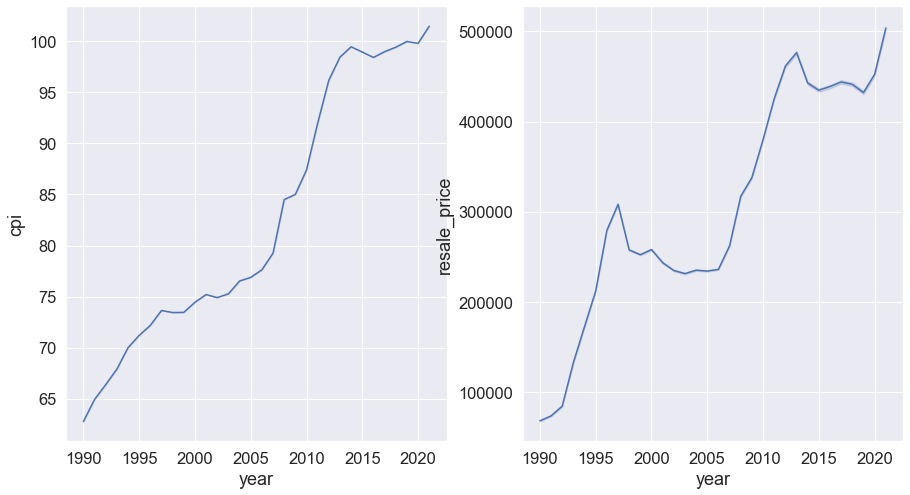

In [49]:
f, axes = plt.subplots(1, 2)
sns.lineplot(x=dataset.year, y=dataset.cpi, ax=axes[0])
sns.lineplot(x=dataset.year, y=dataset.resale_price, ax=axes[1])

From the 2 subplots, it can be identified that the resale prices was greatly affected by the cpi. The trend shows 1990 to 1997 to have the steepest resale price increases, followed by a relative stagnation from 1998 to 2006. The trend upwards continues from 2007 to 2013. Between 2014 to 2020, cpi and resale prices remained fairly stable. We will perform this splits for the 4 Room category once again.

In [73]:
dataset_1990s = dataset[(dataset['year'] >= 1990) & (dataset['year'] <= 1997) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_1990s[['resale_price']]
x = dataset_1990s[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor_1990 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor_1990.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [74]:
# accuracy for prediction on test data
test_data_prediction = regressor_1990.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9163764268911367
Mean Absolute Error :  20374.356085047686


In [75]:
importance = regressor_1990.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 1.83%
remaining_lease: 1.20%
max_storey: 1.29%
dist_mrt: 1.00%
dist_cbd: 2.42%
dist_mall: 2.61%
cpi: 81.98%
town_premium: 3.32%
model_premium: 4.34%


Dataset for year 1998 to 2006 for 4 Room flats

In [70]:
dataset_1998 = dataset[(dataset['year'] >= 1998) & (dataset['year'] <= 2006) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_1998[['resale_price']]
x = dataset_1998[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor_1998 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor_1998.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [71]:
# accuracy for prediction on test data
test_data_prediction = regressor_1998.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8630102096128165
Mean Absolute Error :  11786.291116370176


In [72]:
importance = regressor_1998.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 18.94%
remaining_lease: 16.85%
max_storey: 3.70%
dist_mrt: 4.08%
dist_cbd: 14.33%
dist_mall: 14.07%
cpi: 10.22%
town_premium: 12.73%
model_premium: 5.07%


Dataset for year 2007 to 2013 for 4 Room flats

In [147]:
dataset_2007 = dataset[(dataset['year'] >= 2007) & (dataset['year'] <= 2013) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_2007[['resale_price']]
x = dataset_2007[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor_2007 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor_2007.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [148]:
# accuracy for prediction on test data
test_data_prediction = regressor_2007.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9453190218792331
Mean Absolute Error :  17661.25719920905


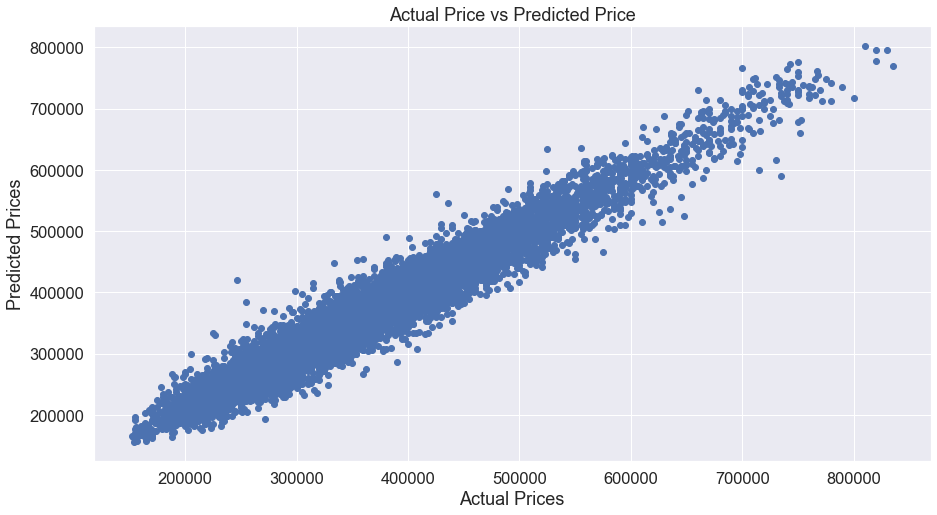

In [149]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [151]:
importance = regressor_2007.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.42%
remaining_lease: 10.73%
max_storey: 2.93%
dist_mrt: 3.22%
dist_cbd: 10.63%
dist_mall: 10.52%
cpi: 52.56%
town_premium: 3.22%
model_premium: 3.77%


Dataset for year 2014 to 2021 for 4 Room flats

In [144]:
dataset_2014 = dataset[(dataset['year'] >= 2014) & (dataset['year'] <= 2021) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_2014[['resale_price']]
x = dataset_2014[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor_2014 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor_2014.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [145]:
# accuracy for prediction on test data
test_data_prediction = regressor_2014.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9516178156949268
Mean Absolute Error :  18383.746287245893


In [146]:
importance = regressor_2014.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 3.93%
remaining_lease: 25.15%
max_storey: 4.53%
dist_mrt: 5.07%
dist_cbd: 22.94%
dist_mall: 22.19%
cpi: 2.56%
town_premium: 8.59%
model_premium: 5.04%
